In [1]:
import pandas as pd
import string
import nltk

nltk.download('stopwords')
nltk.download('punkt')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv ("/content/drive/MyDrive/infnet/developed projects/spam_classification/data/Data_Train.csv")

In [ ]:
df = pd.read_csv('Data_Train.csv')

In [9]:
df

,ID,Message,SPAM
0,615317,Linda msg!,True
1,855344,To fazendo batida de kwui com coco,True
2,1007222,Esse dinheiro só vai sair para quem está com o...,True
3,811063,Isso msm Irmã.. nao lembrava dos nomes kkk,True
4,913944,Ai xara eu sujiro esse,True
...,...,...,...
1768,521420,Meu nome e alex sandro,True
1769,791210,Hum\nTenho ums aki\nN\nTenhos ums piso aki\nE ...,True
1770,1031770,Quem tem padrinho não morre pagão\nQuem tem pa...,True
1771,580122,ALUNO QUE PROCESSOU PROFESSOR POR TER TOMADO C...,True


In [10]:
df.shape

(1773, 3)

In [11]:
df['SPAM'].value_counts()

True     932
False    841
Name: SPAM, dtype: int64

#### Características:
- frequencia de palavras maiusculas
- frequencia de pontuacao
- frequencia de simbolos (emoji)
- quantidade de verbos
- quantidade de palavras
- quantidade de letras
- quantidade de simbolos com mais de 3 ocorrencias (ex: kkkk)


#### Verificando duplicados

In [12]:
# registros duplicados por ID

df[df['ID'].duplicated()]

,ID,Message,SPAM


In [13]:
# mensagens duplicadas

df[df['Message'].duplicated()]

,ID,Message,SPAM
170,473229,Volta já,False
199,545104,---\n---\nEnviado através do WhatsApp,False
320,443562,Ooi,True
372,746170,---\n---\nEnviado através do WhatsApp,False
581,265637,Ooi,True
916,281885,Teste,True
921,411908,"Galera, a próxima manifestação será um pouco d...",True
925,716654,Oii,True
1118,349264,Bom dia rio volta já,False
1229,932346,Bom dia grupo,True


In [14]:
df.drop_duplicates(subset=['Message'], inplace=True)

In [15]:
df.shape

(1758, 3)

### Normalização

In [16]:
def normalize_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords])

In [17]:
df['Message_Norm'] = df['Message'].apply(normalize_text)

### Tokenização

In [18]:
df['Message_Tokens'] = df['Message'].apply(nltk.tokenize.word_tokenize)

### Extração de Features

In [ ]:
df['len'] = df['Message'].apply(len)

In [ ]:
def freqUpper(text):
  uppers = [char for char in text if char.isupper()]
  return len(uppers)

In [ ]:
df['freq_uppers'] = df['Message_Norm'].apply(freqUpper)

In [ ]:
df

,ID,Message,SPAM,Message_Norm,Message_Tokens,len,freq_uppers
0,615317,Linda msg!,True,Linda msg,"[Linda, msg, !]",10,1
1,855344,To fazendo batida de kwui com coco,True,To fazendo batida kwui coco,"[To, fazendo, batida, de, kwui, com, coco]",34,1
2,1007222,Esse dinheiro só vai sair para quem está com o...,True,dinheiro vai sair nome lista dinheiro vai sair...,"[Esse, dinheiro, só, vai, sair, para, quem, es...",137,0
3,811063,Isso msm Irmã.. nao lembrava dos nomes kkk,True,msm Irmã nao lembrava nomes kkk,"[Isso, msm, Irmã, .., nao, lembrava, dos, nome...",42,1
4,913944,Ai xara eu sujiro esse,True,Ai xara sujiro,"[Ai, xara, eu, sujiro, esse]",22,1
...,...,...,...,...,...,...,...
1768,521420,Meu nome e alex sandro,True,nome alex sandro,"[Meu, nome, e, alex, sandro]",22,0
1769,791210,Hum\nTenho ums aki\nN\nTenhos ums piso aki\nE ...,True,Hum ums aki N Tenhos ums piso aki divisoria,"[Hum, Tenho, ums, aki, N, Tenhos, ums, piso, a...",51,3
1770,1031770,Quem tem padrinho não morre pagão\nQuem tem pa...,True,padrinho morre pagão padrinho morre pagão Graç...,"[Quem, tem, padrinho, não, morre, pagão, Quem,...",95,4
1771,580122,ALUNO QUE PROCESSOU PROFESSOR POR TER TOMADO C...,True,ALUNO PROCESSOU PROFESSOR TER TOMADO CELULAR S...,"[ALUNO, QUE, PROCESSOU, PROFESSOR, POR, TER, T...",2715,170


#### Top palavras em mensagens de SPAM

In [ ]:
from collections import Counter

dict_freq_words = {}

for label in [True, False]:
  words = df[df['SPAM']==label]['Message_Norm'].apply(lambda x: [word.lower() for word in x.split()])
  count_words = Counter()
  for txt in words:
      count_words.update(txt)
  
  dict_freq_words[str(label)] = count_words.most_common(50)

In [ ]:
dict_freq_words

{'False': [('rua', 201),
  ('dia', 170),
  ('bom', 114),
  ('q', 96),
  ('boa', 88),
  ('pra', 87),
  ('rio', 80),
  ('bairro', 77),
  ('aqui', 74),
  ('agora', 71),
  ('favor', 69),
  ('ajuda', 68),
  ('nome', 67),
  ('todos', 65),
  ('rj', 64),
  ('nada', 57),
  ('tarde', 56),
  ('hoje', 53),
  ('dias', 51),
  ('ônibus', 51),
  ('fazer', 50),
  ('pois', 49),
  ('prefeitura', 48),
  ('vcs', 47),
  ('hospital', 45),
  ('grande', 45),
  ('frente', 45),
  ('água', 44),
  ('nao', 43),
  ('gostaria', 43),
  ('noite', 41),
  ('anos', 40),
  ('nova', 39),
  ('desde', 38),
  ('casa', 37),
  ('empresa', 35),
  ('local', 35),
  ('volta', 34),
  ('gonçalo', 33),
  ('campo', 32),
  ('estrada', 31),
  ('vai', 31),
  ('carro', 31),
  ('ainda', 30),
  ('assim', 30),
  ('vamos', 30),
  ('onde', 30),
  ('moradores', 29),
  ('brt', 29),
  ('santa', 29)],
 'True': [('vc', 160),
  ('q', 141),
  ('pra', 124),
  ('ta', 122),
  ('dia', 103),
  ('vai', 100),
  ('bom', 95),
  ('nao', 83),
  ('todos', 77),
  (

In [ ]:
dict_freq_words['True']

[('vc', 160),
 ('q', 141),
 ('pra', 124),
 ('ta', 122),
 ('dia', 103),
 ('vai', 100),
 ('bom', 95),
 ('nao', 83),
 ('todos', 77),
 ('n', 68),
 ('agora', 66),
 ('kkk', 65),
 ('kkkk', 65),
 ('boa', 63),
 ('ai', 62),
 ('vou', 58),
 ('to', 55),
 ('vcs', 54),
 ('grupo', 51),
 ('deus', 51),
 ('fazer', 50),
 ('tudo', 50),
 ('mensagem', 47),
 ('rss', 47),
 ('pessoas', 45),
 ('oi', 45),
 ('pode', 43),
 ('aqui', 43),
 ('hoje', 42),
 ('cara', 41),
 ('fala', 40),
 ('nome', 39),
 ('vamos', 39),
 ('quero', 39),
 ('pq', 39),
 ('bem', 38),
 ('kkkkk', 38),
 ('rio', 37),
 ('favor', 36),
 ('sei', 36),
 ('kk', 36),
 ('ver', 35),
 ('😂😂😂', 35),
 ('porra', 34),
 ('nada', 33),
 ('🌑', 33),
 ('🌔', 33),
 ('gente', 32),
 ('5', 31),
 ('🌕', 31)]

In [ ]:
def get_most_commom_spam_words(message):
  values = []
  dict_top_spam_words = {}
  for word in message:
    values.extend([item[0] for item in dict_freq_words['True'] if word in item])
  for value in values:
    try:
      dict_top_spam_words[value] += 1
    except:
      dict_top_spam_words[value] = 1
  return dict_top_spam_words

In [ ]:
df['dict_commom_spam'] = df['Message_Tokens'].apply(get_most_commom_spam_words)

### TODO
- Verificar quantidade de emojis
- Verificar quantidade de pontos (exclamação, final..)
- Pegar informações de POS

Utilizando o Spacy



In [ ]:
import spacy
!python -m spacy download pt_core_news_sm
spc = spacy.load("pt_core_news_sm")

2022-08-15 12:47:07.580229: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/explosion/spacy-models/releases/download/pt_core_news_sm-3.4.0/pt_core_news_sm-3.4.0-py3-none-any.whl (13.0 MB)
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [ ]:
def get_pos(message):
  doc = spc(message)
  dict_pos = {}
  for token in doc:
    try:
      dict_pos[token.pos_] += 1
    except:
      dict_pos[token.pos_] = 1
  return dict_pos

In [ ]:
df['dict_pos'] = df['Message'].apply(get_pos)

In [ ]:
df

,ID,Message,SPAM,Message_Norm,Message_Tokens,len,freq_uppers,dict_pos
0,615317,Linda msg!,True,Linda msg,"[Linda, msg, !]",10,1,"{'PROPN': 1, 'SPACE': 1, 'PUNCT': 1}"
1,855344,To fazendo batida de kwui com coco,True,To fazendo batida kwui coco,"[To, fazendo, batida, de, kwui, com, coco]",34,1,"{'NUM': 1, 'VERB': 1, 'NOUN': 3, 'ADP': 2}"
2,1007222,Esse dinheiro só vai sair para quem está com o...,True,dinheiro vai sair nome lista dinheiro vai sair...,"[Esse, dinheiro, só, vai, sair, para, quem, es...",137,0,"{'DET': 4, 'NOUN': 6, 'ADV': 2, 'AUX': 4, 'VER..."
3,811063,Isso msm Irmã.. nao lembrava dos nomes kkk,True,msm Irmã nao lembrava nomes kkk,"[Isso, msm, Irmã, .., nao, lembrava, dos, nome...",42,1,"{'PRON': 1, 'PROPN': 2, 'PUNCT': 1, 'AUX': 1, ..."
4,913944,Ai xara eu sujiro esse,True,Ai xara sujiro,"[Ai, xara, eu, sujiro, esse]",22,1,"{'ADP': 1, 'NOUN': 1, 'PRON': 1, 'VERB': 1, 'D..."
...,...,...,...,...,...,...,...,...
1768,521420,Meu nome e alex sandro,True,nome alex sandro,"[Meu, nome, e, alex, sandro]",22,0,"{'DET': 1, 'NOUN': 1, 'CCONJ': 1, 'PROPN': 2}"
1769,791210,Hum\nTenho ums aki\nN\nTenhos ums piso aki\nE ...,True,Hum ums aki N Tenhos ums piso aki divisoria,"[Hum, Tenho, ums, aki, N, Tenhos, ums, piso, a...",51,3,"{'SCONJ': 1, 'SPACE': 4, 'VERB': 2, 'PRON': 1,..."
1770,1031770,Quem tem padrinho não morre pagão\nQuem tem pa...,True,padrinho morre pagão padrinho morre pagão Graç...,"[Quem, tem, padrinho, não, morre, pagão, Quem,...",95,4,"{'PRON': 2, 'AUX': 2, 'NOUN': 4, 'ADV': 4, 'VE..."
1771,580122,ALUNO QUE PROCESSOU PROFESSOR POR TER TOMADO C...,True,ALUNO PROCESSOU PROFESSOR TER TOMADO CELULAR S...,"[ALUNO, QUE, PROCESSOU, PROFESSOR, POR, TER, T...",2715,170,"{'NOUN': 119, 'PROPN': 35, 'ADP': 63, 'VERB': ..."


In [ ]:
import json

In [ ]:
df['dict_pos'] = df['dict_pos'].apply(lambda x: str(x).replace('\'','"').replace('None', '0').replace('True', '1').replace('False', '0'))

In [ ]:
df_pos = df['dict_pos'].apply(json.loads).apply(pd.Series).fillna(0)

In [ ]:
df_pos

,PROPN,SPACE,PUNCT,NUM,VERB,NOUN,ADP,DET,ADV,AUX,SCONJ,PRON,ADJ,CCONJ,X,INTJ,SYM
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,5.0,8.0,4.0,2.0,6.0,4.0,4.0,2.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1769,0.0,4.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1770,2.0,3.0,0.0,0.0,2.0,4.0,2.0,0.0,4.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1771,35.0,15.0,75.0,1.0,56.0,119.0,63.0,64.0,21.0,9.0,14.0,14.0,21.0,18.0,1.0,0.0,0.0


In [ ]:
df = pd.concat([df, df_pos],axis=1)

In [ ]:
df

,ID,Message,SPAM,Message_Norm,Message_Tokens,len,freq_uppers,dict_pos,PROPN,SPACE,...,DET,ADV,AUX,SCONJ,PRON,ADJ,CCONJ,X,INTJ,SYM
0,615317,Linda msg!,True,Linda msg,"[Linda, msg, !]",10,1,"{""PROPN"": 1, ""SPACE"": 1, ""PUNCT"": 1}",1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,855344,To fazendo batida de kwui com coco,True,To fazendo batida kwui coco,"[To, fazendo, batida, de, kwui, com, coco]",34,1,"{""NUM"": 1, ""VERB"": 1, ""NOUN"": 3, ""ADP"": 2}",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1007222,Esse dinheiro só vai sair para quem está com o...,True,dinheiro vai sair nome lista dinheiro vai sair...,"[Esse, dinheiro, só, vai, sair, para, quem, es...",137,0,"{""DET"": 4, ""NOUN"": 6, ""ADV"": 2, ""AUX"": 4, ""VER...",0.0,5.0,...,4.0,2.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,811063,Isso msm Irmã.. nao lembrava dos nomes kkk,True,msm Irmã nao lembrava nomes kkk,"[Isso, msm, Irmã, .., nao, lembrava, dos, nome...",42,1,"{""PRON"": 1, ""PROPN"": 2, ""PUNCT"": 1, ""AUX"": 1, ...",2.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,913944,Ai xara eu sujiro esse,True,Ai xara sujiro,"[Ai, xara, eu, sujiro, esse]",22,1,"{""ADP"": 1, ""NOUN"": 1, ""PRON"": 1, ""VERB"": 1, ""D...",0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,521420,Meu nome e alex sandro,True,nome alex sandro,"[Meu, nome, e, alex, sandro]",22,0,"{""DET"": 1, ""NOUN"": 1, ""CCONJ"": 1, ""PROPN"": 2}",2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1769,791210,Hum\nTenho ums aki\nN\nTenhos ums piso aki\nE ...,True,Hum ums aki N Tenhos ums piso aki divisoria,"[Hum, Tenho, ums, aki, N, Tenhos, ums, piso, a...",51,3,"{""SCONJ"": 1, ""SPACE"": 4, ""VERB"": 2, ""PRON"": 1,...",0.0,4.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1770,1031770,Quem tem padrinho não morre pagão\nQuem tem pa...,True,padrinho morre pagão padrinho morre pagão Graç...,"[Quem, tem, padrinho, não, morre, pagão, Quem,...",95,4,"{""PRON"": 2, ""AUX"": 2, ""NOUN"": 4, ""ADV"": 4, ""VE...",2.0,3.0,...,0.0,4.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1771,580122,ALUNO QUE PROCESSOU PROFESSOR POR TER TOMADO C...,True,ALUNO PROCESSOU PROFESSOR TER TOMADO CELULAR S...,"[ALUNO, QUE, PROCESSOU, PROFESSOR, POR, TER, T...",2715,170,"{""NOUN"": 119, ""PROPN"": 35, ""ADP"": 63, ""VERB"": ...",35.0,15.0,...,64.0,21.0,9.0,14.0,14.0,21.0,18.0,1.0,0.0,0.0


Transformando frequencia em porcentagem

In [ ]:
df['len_tokens'] = df['Message_Tokens'].apply(len)

In [ ]:
df

,ID,Message,SPAM,Message_Norm,Message_Tokens,len,freq_uppers,dict_pos,PROPN,SPACE,...,ADV,AUX,SCONJ,PRON,ADJ,CCONJ,X,INTJ,SYM,len_tokens
0,615317,Linda msg!,True,Linda msg,"[Linda, msg, !]",10,1,"{""PROPN"": 1, ""SPACE"": 1, ""PUNCT"": 1}",1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,855344,To fazendo batida de kwui com coco,True,To fazendo batida kwui coco,"[To, fazendo, batida, de, kwui, com, coco]",34,1,"{""NUM"": 1, ""VERB"": 1, ""NOUN"": 3, ""ADP"": 2}",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
2,1007222,Esse dinheiro só vai sair para quem está com o...,True,dinheiro vai sair nome lista dinheiro vai sair...,"[Esse, dinheiro, só, vai, sair, para, quem, es...",137,0,"{""DET"": 4, ""NOUN"": 6, ""ADV"": 2, ""AUX"": 4, ""VER...",0.0,5.0,...,2.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,36
3,811063,Isso msm Irmã.. nao lembrava dos nomes kkk,True,msm Irmã nao lembrava nomes kkk,"[Isso, msm, Irmã, .., nao, lembrava, dos, nome...",42,1,"{""PRON"": 1, ""PROPN"": 2, ""PUNCT"": 1, ""AUX"": 1, ...",2.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9
4,913944,Ai xara eu sujiro esse,True,Ai xara sujiro,"[Ai, xara, eu, sujiro, esse]",22,1,"{""ADP"": 1, ""NOUN"": 1, ""PRON"": 1, ""VERB"": 1, ""D...",0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,521420,Meu nome e alex sandro,True,nome alex sandro,"[Meu, nome, e, alex, sandro]",22,0,"{""DET"": 1, ""NOUN"": 1, ""CCONJ"": 1, ""PROPN"": 2}",2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5
1769,791210,Hum\nTenho ums aki\nN\nTenhos ums piso aki\nE ...,True,Hum ums aki N Tenhos ums piso aki divisoria,"[Hum, Tenho, ums, aki, N, Tenhos, ums, piso, a...",51,3,"{""SCONJ"": 1, ""SPACE"": 4, ""VERB"": 2, ""PRON"": 1,...",0.0,4.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,11
1770,1031770,Quem tem padrinho não morre pagão\nQuem tem pa...,True,padrinho morre pagão padrinho morre pagão Graç...,"[Quem, tem, padrinho, não, morre, pagão, Quem,...",95,4,"{""PRON"": 2, ""AUX"": 2, ""NOUN"": 4, ""ADV"": 4, ""VE...",2.0,3.0,...,4.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,18
1771,580122,ALUNO QUE PROCESSOU PROFESSOR POR TER TOMADO C...,True,ALUNO PROCESSOU PROFESSOR TER TOMADO CELULAR S...,"[ALUNO, QUE, PROCESSOU, PROFESSOR, POR, TER, T...",2715,170,"{""NOUN"": 119, ""PROPN"": 35, ""ADP"": 63, ""VERB"": ...",35.0,15.0,...,21.0,9.0,14.0,14.0,21.0,18.0,1.0,0.0,0.0,527


In [ ]:
df.columns

Index(['ID', 'Message', 'SPAM', 'Message_Norm', 'Message_Tokens', 'len',
       'freq_uppers', 'dict_pos', 'PROPN', 'SPACE', 'PUNCT', 'NUM', 'VERB',
       'NOUN', 'ADP', 'DET', 'ADV', 'AUX', 'SCONJ', 'PRON', 'ADJ', 'CCONJ',
       'X', 'INTJ', 'SYM'],
      dtype='object')

In [ ]:
numeric_columns = ['freq_uppers', 'PROPN', 'SPACE', 'PUNCT', 'NUM', 'VERB',
       'NOUN', 'ADP', 'DET', 'ADV', 'AUX', 'SCONJ', 'PRON', 'ADJ', 'CCONJ',
       'X', 'INTJ', 'SYM']

In [ ]:
for column in numeric_columns:
  df[column] = (df[column] / df['len_tokens']) * 100

In [ ]:
df['len_common_spam_words'] = df['dict_commom_spam'].apply(lambda x: sum(x.values()))

In [ ]:
df['pct_common_spam_words'] = (df['len_common_spam_words'] / df['len_tokens']) * 100

In [ ]:
df

,ID,Message,SPAM,Message_Norm,Message_Tokens,len,freq_uppers,dict_pos,PROPN,SPACE,...,PRON,ADJ,CCONJ,X,INTJ,SYM,len_tokens,dict_commom_spam,len_common_spam_words,pct_common_spam_words
0,615317,Linda msg!,True,Linda msg,"[Linda, msg, !]",10,33.333333,"{""PROPN"": 1, ""SPACE"": 1, ""PUNCT"": 1}",33.333333,33.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3,{},0,0.000000
1,855344,To fazendo batida de kwui com coco,True,To fazendo batida kwui coco,"[To, fazendo, batida, de, kwui, com, coco]",34,14.285714,"{""NUM"": 1, ""VERB"": 1, ""NOUN"": 3, ""ADP"": 2}",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,7,{},0,0.000000
2,1007222,Esse dinheiro só vai sair para quem está com o...,True,dinheiro vai sair nome lista dinheiro vai sair...,"[Esse, dinheiro, só, vai, sair, para, quem, es...",137,0.000000,"{""DET"": 4, ""NOUN"": 6, ""ADV"": 2, ""AUX"": 4, ""VER...",0.000000,13.888889,...,5.555556,0.000000,0.000000,0.000000,0.0,0.0,36,"{'vai': 2, 'nome': 2}",4,11.111111
3,811063,Isso msm Irmã.. nao lembrava dos nomes kkk,True,msm Irmã nao lembrava nomes kkk,"[Isso, msm, Irmã, .., nao, lembrava, dos, nome...",42,11.111111,"{""PRON"": 1, ""PROPN"": 2, ""PUNCT"": 1, ""AUX"": 1, ...",22.222222,0.000000,...,11.111111,0.000000,0.000000,0.000000,0.0,0.0,9,"{'nao': 1, 'kkk': 1}",2,22.222222
4,913944,Ai xara eu sujiro esse,True,Ai xara sujiro,"[Ai, xara, eu, sujiro, esse]",22,20.000000,"{""ADP"": 1, ""NOUN"": 1, ""PRON"": 1, ""VERB"": 1, ""D...",0.000000,0.000000,...,20.000000,0.000000,0.000000,0.000000,0.0,0.0,5,{},0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,521420,Meu nome e alex sandro,True,nome alex sandro,"[Meu, nome, e, alex, sandro]",22,0.000000,"{""DET"": 1, ""NOUN"": 1, ""CCONJ"": 1, ""PROPN"": 2}",40.000000,0.000000,...,0.000000,0.000000,20.000000,0.000000,0.0,0.0,5,{'nome': 1},1,20.000000
1769,791210,Hum\nTenho ums aki\nN\nTenhos ums piso aki\nE ...,True,Hum ums aki N Tenhos ums piso aki divisoria,"[Hum, Tenho, ums, aki, N, Tenhos, ums, piso, a...",51,27.272727,"{""SCONJ"": 1, ""SPACE"": 4, ""VERB"": 2, ""PRON"": 1,...",0.000000,36.363636,...,9.090909,9.090909,9.090909,0.000000,0.0,0.0,11,{},0,0.000000
1770,1031770,Quem tem padrinho não morre pagão\nQuem tem pa...,True,padrinho morre pagão padrinho morre pagão Graç...,"[Quem, tem, padrinho, não, morre, pagão, Quem,...",95,22.222222,"{""PRON"": 2, ""AUX"": 2, ""NOUN"": 4, ""ADV"": 4, ""VE...",11.111111,16.666667,...,11.111111,0.000000,0.000000,0.000000,0.0,0.0,18,{},0,0.000000
1771,580122,ALUNO QUE PROCESSOU PROFESSOR POR TER TOMADO C...,True,ALUNO PROCESSOU PROFESSOR TER TOMADO CELULAR S...,"[ALUNO, QUE, PROCESSOU, PROFESSOR, POR, TER, T...",2715,32.258065,"{""NOUN"": 119, ""PROPN"": 35, ""ADP"": 63, ""VERB"": ...",6.641366,2.846300,...,2.656546,3.984820,3.415560,0.189753,0.0,0.0,527,"{'q': 2, 'pessoas': 1, 'bem': 1, 'bom': 1}",5,0.948767


### Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
df.columns

Index(['ID', 'Message', 'SPAM', 'Message_Norm', 'Message_Tokens', 'len',
       'freq_uppers', 'dict_pos', 'PROPN', 'SPACE', 'PUNCT', 'NUM', 'VERB',
       'NOUN', 'ADP', 'DET', 'ADV', 'AUX', 'SCONJ', 'PRON', 'ADJ', 'CCONJ',
       'X', 'INTJ', 'SYM', 'len_tokens', 'dict_commom_spam',
       'len_common_spam_words', 'pct_common_spam_words'],
      dtype='object')

In [ ]:
df['SPAM'] = df['SPAM'].map({True:1, False:0})

In [ ]:
X = df[['len', 'freq_uppers', 'PROPN', 'SPACE', 'PUNCT', 'NUM', 'VERB',
       'NOUN', 'ADP', 'DET', 'ADV', 'AUX', 'SCONJ', 'PRON', 'ADJ', 'CCONJ',
       'X', 'INTJ', 'SYM', 'len_tokens', 'pct_common_spam_words']]

Y = df['SPAM']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=42, stratify=Y)

In [ ]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = lr.predict(x_test_scaled)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

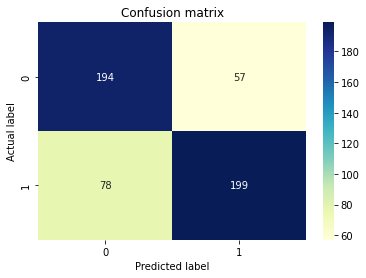

In [ ]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, 
                cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7457


In [ ]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(lr, x_train_scaled, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8158


In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       251
           1       0.78      0.72      0.75       277

    accuracy                           0.74       528
   macro avg       0.75      0.75      0.74       528
weighted avg       0.75      0.74      0.74       528



In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn, param_grid,cv=10)
knn_cv.fit(x_train_scaled, y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7439024390243902
Best Parameters: {'n_neighbors': 19}


In [ ]:
knn = KNeighborsClassifier(19)
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=19)

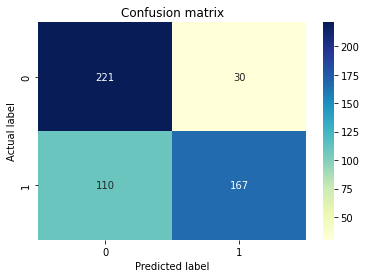

In [ ]:
y_pred = knn.predict(x_test_scaled)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)


p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, 
                cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76       251
           1       0.85      0.60      0.70       277

    accuracy                           0.73       528
   macro avg       0.76      0.74      0.73       528
weighted avg       0.76      0.73      0.73       528

